## Working with Projections

[**Projections**](https://en.wikipedia.org/wiki/Map_projection) are the ``geoplot`` killer feature.

Allow me to explain. The simplest starting point is `polyplot`. This rudimentary plot type which simply takes the geometry in the data and plops it down on a map: nothing more.

In [7]:
import sys; sys.path.insert(0, '../../')  # ignore this
import geopandas as gpd
import geoplot as gplt
%matplotlib inline

In [5]:
usa = gpd.read_file("../../data/united_states/usa.geojson")
usa = usa[~usa['adm1_code'].isin(['USA-3517', 'USA-3563'])]

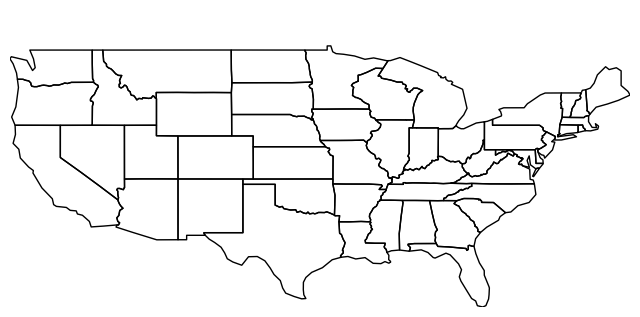

In [8]:
gplt.polyplot(usa)

This is an example of an **unprojected plot**. It faithfully reproduces exact latitude and longitudes as Cartesian coordinates on a plane.

But remember, the Earth is not a flat surface; it's a sphere. This isn't a map of the United States that you'd seen in print anywhere because it badly distorts both of the [two criteria](http://www.geo.hunter.cuny.edu/~jochen/gtech201/lectures/lec6concepts/Map%20coordinate%20systems/How%20to%20choose%20a%20projection.htm) most projections are evaluated on: *shape* and *area*.

Nevertheless, unprojected plots have their uses. Firstly, for small features, unprojected plots are usually OK. Second of all, there is the fact that when not provided a projection ``geoplot`` tries to output a pure ``matplotlib`` figure, which means that this tool can be easily incorporated with other ``matplotlib`` figures or with other tools, like ``mplleaflet``, which expect ``matplotlib`` input.

But if we're not trying to achieve either of these things, it's better to pick a good projection and use that instead.

In the case of the contiguous United States, the coordinate reference system most often used is known as the Albers Equal Area projection. To place our plot in a projection, we need to pass the projection of interest to the `projection` keyword parameter. ``geoplot`` functions expect input to come from the `geoplot.crs` module, imported as ``ccrs`` by convention.

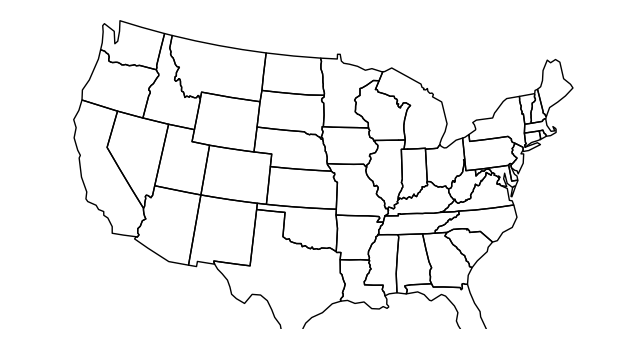

In [10]:
import geoplot.crs as ccrs
gplt.polyplot(usa, projection=ccrs.AlbersEqualArea())

``geoplot`` projections are a very thin wrapper on ``cartopy.crs`` projections, and every ``cartopy`` projection is implemented in ``geoplot.crs``. As such, for a list of implemented projections [refer to the Cartopy documentation](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html).

You may be wondering, if ``geoplot.crs`` is a wrapper on ``cartopy.crs``, why not just use Cartopy CRS objects directly? This comes down to an important implementation detail: when Cartopy CRS objects are used as the library  intends for them to be used, projection geolocation settings are supposed to be defined as parameters to the projection and cannot be modified after instantiation. This means that if you don't explicitly specify otherwise yourself, a Cartopy CRS object will result in a map centered on mid-Africa&mdash;coordinate `(0, 0)`!

``geoplot`` avoids forcing this extra work on the user by computing sensible defaults, based on the data provided, when exact settings are not provided. This is why the plot above "just works": ``geoplot`` computed the mean centroid of the polygons and centered the plot on that coordinate in the background. This feature comes at the cost of a little bit of awkwardness, requiring our wrapper classes, but overall the tradeoff seems to be very "worth it".

The defaults aren't perfect, however. If you look closely at this figure you'll notice that our copy of the United States is ever so slightly skewed downwards and to the right, indicating that our settings are a teeny bit wrong. We can correct this by specifying the centering coordinates ourselves.

The [center of the contiguous United States](https://en.wikipedia.org/wiki/Geographic_center_of_the_contiguous_United_States) is 39°50′N 98°35′W. If we provide approximately these coordinates as `central_latitude` and `central_longitude` coordinates to our projection, our skew is fixed!

(Editor's Note: Fitting projections boundaries is still a WIP, hence the weirdness.)

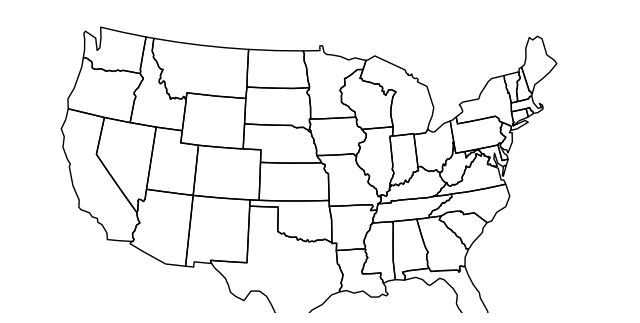

In [11]:
gplt.polyplot(usa, projection=ccrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5))

This is the version of the map of the United States that you're probably most familiar with.

Of course, why stop there? I encourage you to experiment with some of the crazier projections (like ``Gnomonic``) that ``cartopy`` provides. Of particular value are global projections, which provide a way of visualizing your data on top of an actual for-real sphere&mdash;neat! A demonstrative exame is provided below.

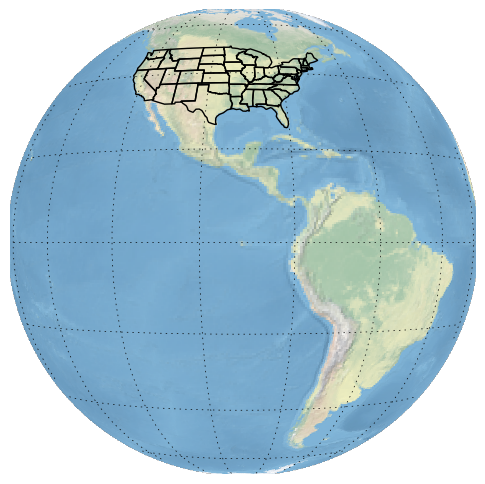

In [33]:
ax = gplt.polyplot(usa, projection=ccrs.Geostationary())
ax.set_global()
ax.gridlines()
ax.stock_img()

[Click here to continue to the next section of the tutorial: "Plotting"](.).